# Seaborn - Survol <a class="tocSkip">
Le but de ce fichier est de vous fournir un récapitulatif des différentes composantes que vous avez vus pendant le [cours Kaggle de *Data Visualization*](https://www.kaggle.com/learn/data-visualization). La librairie `seaborn` est une librairie (tierce) populaire pour visualiser des données.

Pour pouvoir utiliser `seaborn`, nous devons d'abord l'importer. Une autre librairie couramment importée avec `seaborn` est la librairie `matplotlib.pyplot`, plus tard appelée `plt`. Cette librairie est utile pour ajuster les graphiques au-delà des simples paramètres autorisés dans la librairie `seaborn`. Notez que `seaborn` est en fait basé sur la librairie `matplotlib`.

Notez également que nous utilisons la commande *magique* `%matplotlib inline`. Ceci est pour nous assurer que nos graphiques sont affichés dans notre *Jupyter Notebook*. Les autres options sont `%matplotlib` (qui affiche les chiffres dans des fenêtres séparées) et `%matplotlib notebook` (qui affiche des graphiques "interactifs" dans le notebook). Vous pouvez essayer ces autres options en modifiant la commande magique, puis en cliquant sur Kernel > Restart & Run All.

Enfin, nous importons `pandas` puisque nous utilisons cette bibliothèque pour manipuler nos données.

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Charger les données
Chargons à nouveau les données `salesCerealsOriginal.csv` que nous avons utilisées pour le survol de `pandas`.

In [2]:
df = pd.read_csv('salesCerealsOriginal.csv', parse_dates=['WEEK_END_DATE'])
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL


Dans ce notebook, nous allons faire plusieurs analyses par UPC. Par conséquent, j'extrais la description de chaque UPC ci-dessous pour savoir à quoi correspond chaque UPC. Notez que deux UPC font référence à la même DESCRIPTION.

In [3]:
# Construit une Series où chaque élément est une chaîne de caractères avec l'UPC en premier
# et la DESCRIPTION en second
temp = df['UPC'].astype(str) + ' ' + df['DESCRIPTION']

# Parcourt chaque élément unique de cette Series pour extraire l'UPC et la DESCRIPTION
# Définit l'UPC comme la clé de `upc_desc` et la DESCRIPTION comme la valeur de` upc_desc`
upc_desc = {}
for x in temp.unique():
    x_lst = x.split()
    upc_desc[x_lst[0]] = ' '.join(x_lst[1:])

upc_desc

{'1111085319': 'PL HONEY NUT TOASTD OATS',
 '1111085350': 'PL BT SZ FRSTD SHRD WHT',
 '1600027527': 'GM HONEY NUT CHEERIOS',
 '1600027528': 'GM CHEERIOS',
 '1600027564': 'GM CHEERIOS',
 '3000006340': 'QKER LIFE ORIGINAL',
 '3800031829': 'KELL BITE SIZE MINI WHEAT'}

# Graphique linéaire
La librairie `seaborn` est capable de générer une grande variété de figures. Nous explorons d'abord comment générer des graphiques linéaires (c.-à-d. des *lineplots*).

Ici, je veux faire un graphique où chaque ligne correspond aux unités vendues d'un UPC au fil du temps. Pour dessiner ces lignes, je peux utiliser les paramètres `hue`, `size` ou `style`.

Pourtant, il semble que `hue` ne fonctionne pas ici (voir ci-dessous). Seaborn pense que les UPC sont des nombres et non des catégories. La conversion de ces UPC en chaînes de caractères ne résout pas ce problème. Pour référence, voir [stackoverflow](https://stackoverflow.com/questions/51525284/the-hue-parameter-in-seaborn-relplot-skips-an-integer-when-given-numerical-d).

<AxesSubplot:title={'center':'Number of units sold each week per UPC'}, xlabel='WEEK_END_DATE', ylabel='UNITS'>

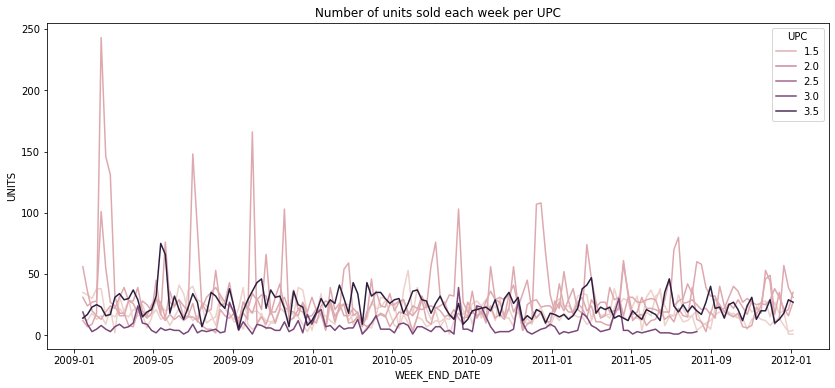

In [4]:
plt.figure(figsize=(14, 6))
plt.title('Number of units sold each week per UPC')
sns.lineplot(data=df, x='WEEK_END_DATE', y='UNITS', hue='UPC')

Pour résoudre le problème précédent, je vais générer une colonne UNITS par UPC en utilisant la fonction `pivot` de `pandas`. J'ai également défini le WEEK_END_DATE comme index. Ce `DataFrame` modifié est nommé `temp`.

(Une autre option serait de créer une nouvelle colonne `DataFrame` qui serait interprétée comme des catégories à coup sûr: par exemple, du texte et pas seulement des chiffres.)

In [5]:
temp = df.set_index('WEEK_END_DATE').pivot(columns='UPC', values='UNITS')
temp.head()

UPC,1111085319,1111085350,1600027527,1600027528,1600027564,3000006340,3800031829
WEEK_END_DATE,,,,,,,
2009-01-14,14.0,35.0,12.0,31.0,56.0,19.0,14.0
2009-01-21,12.0,33.0,7.0,24.0,36.0,9.0,17.0
2009-01-28,18.0,30.0,9.0,27.0,20.0,3.0,23.0
2009-02-04,13.0,38.0,18.0,28.0,16.0,5.0,25.0
2009-02-11,16.0,38.0,243.0,101.0,13.0,8.0,23.0


Je peux maintenant dessiner ces lignes en utilisant `temp`. Notez que j'ai désactivé les `dashes` car ils ne peuvent pas dépasser 6 lignes pointillées différentes et ici nous avons 7 UPC. La définition de `dashes` avec `False` supprime l'erreur.

<AxesSubplot:title={'center':'Number of units sold each week per UPC'}, xlabel='WEEK_END_DATE'>

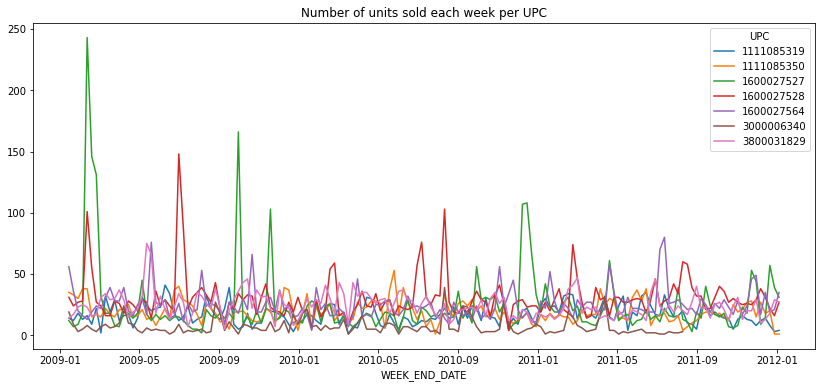

In [6]:
plt.figure(figsize=(14, 6))
plt.title('Number of units sold each week per UPC')
sns.lineplot(data=temp, dashes=False)

Regardons plus en détail le lineplot de l'UPC 1600027527, pour mieux voir les différents pics dont il dispose. J'ai mis cette couleur de ligne au vert pour la cohérence.

Text(0.5, 0, 'WEEK_END_DATE')

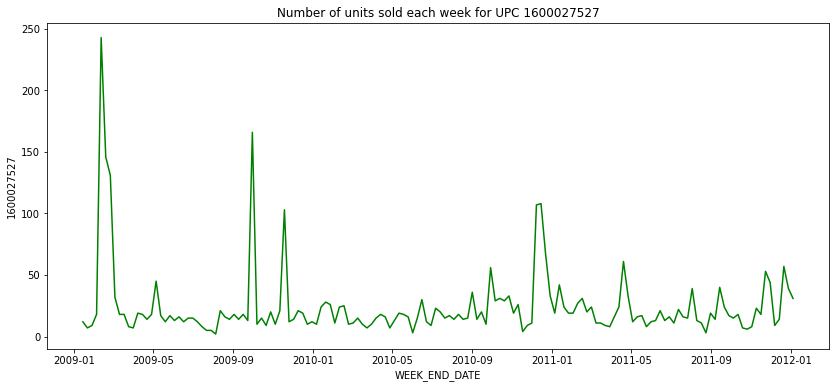

In [7]:
plt.figure(figsize=(14, 6))
plt.title('Number of units sold each week for UPC 1600027527')
sns.lineplot(data=temp[1600027527], color='green')
plt.xlabel('WEEK_END_DATE')

Il est maintenant temps de réfléchir à ce que nous avons fait. La génération de ces lignes nécessitait la fonction `sns.lineplot()` (regardez la [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html) pour plus d'informations). Nous pouvons fournir des données à cette fonction (et à d'autres fonctions `seaborn`) dans différents formats. Si je règle les paramètres `data`, je peux alors définir les paramètres `x` et `y` en utilisant uniquement des chaînes de caractères (c.-à-d., le libellé de la colonne `DataFrame` correspondante). Sinon, je peux définir les paramètres `x` et` y` en utilisant directement les vecteurs/`Series`. Si je ne fournis qu'un `DataFrame` ou `Series` au paramètre `data`, `seaborn` utilise l'index pour `x` et toutes les autres colonnes pour `y`.

Notez que j'ai également changé la taille de la figure, le titre et l'étiquette de l'axe des x en utilisant différentes commandes `plt` de la bibliothèque` matplotlib`.

# Diagramme à barres
Comparons maintenant les ventes totales (en unités) de chacun de ces UPC à l'aide de diagrammes à barres. Pour ce faire, je crée d'abord un nouveau `DataFrame` contenant le total des ventes pour chaque UPC.

In [8]:
# Calculer la somme des ventes par UPC
temp = df.groupby('UPC').UNITS.sum()
temp

UPC
1111085319    2631
1111085350    2994
1600027527    3760
1600027528    4690
1600027564    3871
3000006340     945
3800031829    3788
Name: UNITS, dtype: int64

Mettons maintenant ces nombres dans un graphique à barres en utilisant la fonction `sns.barplot()`. Notez que je fournis maintenant les données d'une manière différente.

<AxesSubplot:title={'center':'Total number of units sold per UPC'}, xlabel='UPC', ylabel='UNITS'>

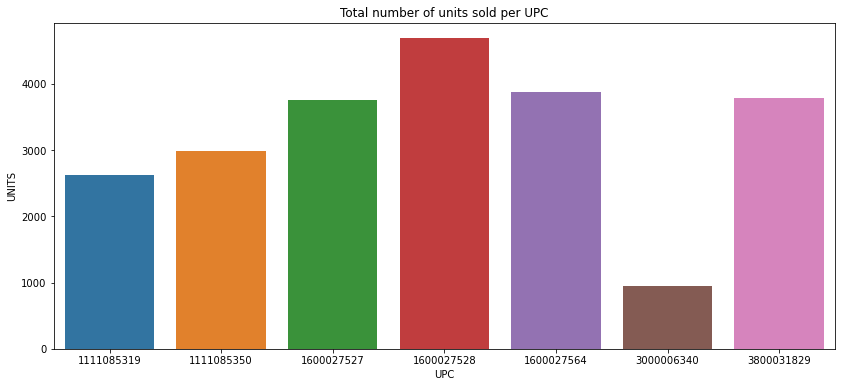

In [9]:
plt.figure(figsize=(14, 6))
plt.title('Total number of units sold per UPC')
sns.barplot(x=temp.index, y=temp)

C'était assez facile. Par contre, cela transcende plusieurs meilleures pratiques de visualisation. Disons que je voudrais mettre en évidence les ventes de l'UPC 1600027527 par rapport aux ventes des autres UPC, tout en suivant ces meilleures pratiques. Est-ce possible avec `seaborn`?

Oui, voir ci-dessous! Mais du code supplémentaire est nécessaire! Reportez-vous aux commentaires du code pour comprendre ce que fait chaque morceau de code.

In [10]:
# Trie les UPC par nombre total d'unités en ordre décroissant
# Le reset_index() le plus à droite est facultatif. C'est seulement pour avoir un index qui est ordonné.
temp = temp.reset_index().sort_values(
    by='UNITS', ascending=False).reset_index(drop=True)

# Ajoute une colonne à temp en spécifiant la couleur de chaque barre
# Pour les noms des couleurs, regardez https://matplotlib.org/3.1.0/gallery/color/named_colors.html
temp['CLRS'] = temp.apply(
    lambda x: 'deepskyblue'
    if x.UPC == 1600027527 else 'grey', axis='columns')

temp

,UPC,UNITS,CLRS
0,1600027528,4690,grey
1,1600027564,3871,grey
2,3800031829,3788,grey
3,1600027527,3760,deepskyblue
4,1111085350,2994,grey
5,1111085319,2631,grey
6,3000006340,945,grey


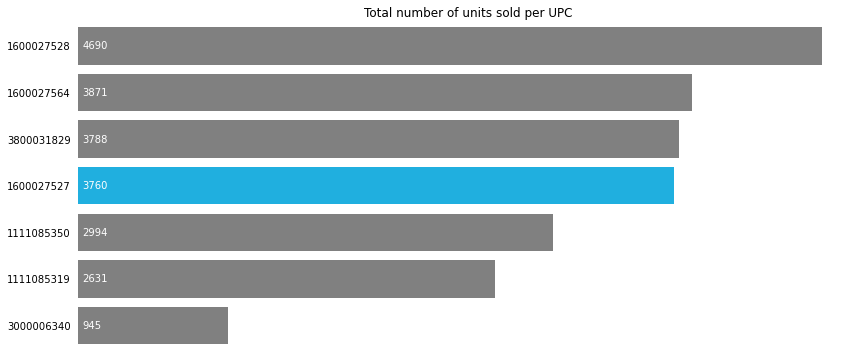

In [11]:
# Génère la figure
plt.figure(figsize=(14, 6))
g = sns.barplot(data=temp, x='UNITS', y='UPC', orient='h', palette=temp.CLRS, order=temp['UPC'])

# Ajoute des valeurs dans les barres
# Regardez https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
for p in g.patches:
    x = p.get_x() + 30
    y = p.get_y() + p.get_height() / 2
    value = int(p.get_width())
    g.text(x, y, value, ha='left', va='center', color='white')

# Réorganise les axes x et y
# Regardez https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.tick_params(
    axis='x',          # les modifications s'appliquent à l'axe des x
    which='both',      # les marques majeures et mineures sont affectées
    bottom=False,      # les marques le long du bord inférieur sont désactivées
    top=False,         # les marques le long du bord supérieur sont désactivées
    labelbottom=False) # les étiquettes le long du bord inférieur sont désactivées
plt.xlabel('')
plt.tick_params(
    axis='y',          # les modifications s'appliquent à l'axe des y
    which='both',      # les marques majeures et mineures sont affectées
    left=False,        # les marques le long du bord gauche sont désactivées
    right=False,       # les marques le long du bord droit sont désactivées
    labelleft=True)    # les étiquettes le long du bord gauche sont activées
plt.ylabel('')

# Définit le titre
plt.title('Total number of units sold per UPC')

# Retire la boîte autour de la figure
# Regardez https://stackoverflow.com/questions/22016965/removing-frame-while-keeping-axes-in-pyplot-subplots
plt.box(on=None)

# Bullet graph
Il est aussi possible de venir ajouter plusieurs informations contextuelles à des diagrammes à barres (p.ex., indication de la performance, comparaison par rapport à l'année précédente). Ces nouveaux diagrammes sont appelés des *bullet graphs*. Voici une fonction qui permet de générer de tels *bullet graphs* avec `seaborn`.

In [12]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ 
    Construit un bullet graph. Adapté de https://pbpython.com/bullet-graph.html
    Paramètres:
        data: liste des étiquettes, valeurs et cibles
        limits: liste des valeurs des intervalles
        labels: liste des étiquettes des intervalles
        axis_label: str, étiquette de l'axe des x
        title: str, titre de la figure
        size: tuple, dimension de la figure
        palette: palette seaborn, pour les intervalles
        formatter: formatteur matplotlib, pour l'axe des x
        target_color: str, couleur pour la ligne cible
        bar_color: str, couleur pour la petite barre
        label_color: str, couleur pour les étiquettes des intervalles
    Renvoie:
        une figure matplotlib
    """
    # Détermine la valeur maximale pour ajuster la hauteur des barres
    # Diviser par 15 semble bien fonctionner
    h = limits[-1] / 15

    # La palette verte semble une bonne valeur par défaut
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Pour être en mesure de gérer un ou plusieurs bullet graphs
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Ajouter chaque bullet graph à un subplot
    for idx, item in enumerate(data):
        
        # Obtenir l'axe correspondant à ce bullet graph
        if len(data) > 1:
            ax = axarr[idx]

        # Enlever le superflue pour améliorer le ratio donnée-encre
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Dessiner la barre de chaque intervalle
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        
        # Dessiner la valeur que nous mesurons
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Dessiner la valeur cible
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .6, ymax * .6, linewidth=1.5, color=target_color)

    # Ajouter les étiquettes
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)
    
def thousands(x, pos):
    """
    Ajoute le séparateur par millier et enlève les décimales.
    Doit avoir 2 paramètres selon matplotlib.
    """
    return f"{x:,.0f}"

# pour ajouter un séparateur de millier aux étiquettes
thousands_fmt = FuncFormatter(thousands)

Avec cette fonction, nous obtenons la figure ci-dessous. Dans cette figure, la barre noire horizontale montre le cumul annuel des ventes jusqu'à ce jour. Puis, les trois régions grises montrent respectivement une mauvaise valeur, une valeur adéquate et une excellente valeur de vente. Ces trois régions pourraient bien-sûr différer d'un produit à l'autre (en modifiant la fonction ci-dessus). Finalement, la barre verticale noire représente les ventes cumulées à pareille date l'année dernière. Cette barre sert de point de comparaison pour vérifier si l'année courante est meilleure que l'année dernière.

C:\Users\11143054\AppData\Local\Temp/ipykernel_26272/285193382.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


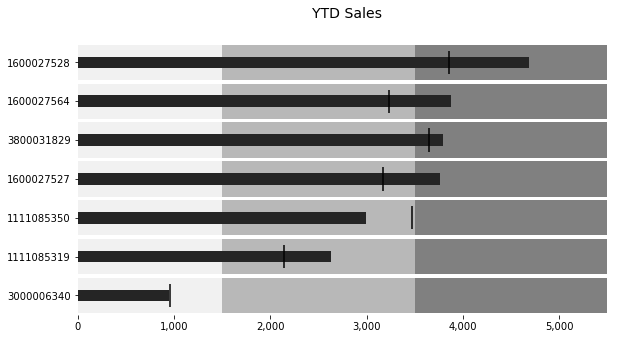

In [13]:
# On supplémente les données du diagramme à barre avec une valeur de 
# comparaison pour l'année dernière (générée de façon aléatoire)
random.seed(123)  # fixe la graine aléatoire
data_to_plot = temp.values[:,:-1].tolist()  # extrait les données
data_to_plot = [(str(x[0]), x[1], round(x[1] * random.uniform(0.8, 1.2)))
                for x in data_to_plot]  # réorganise les données

palette = sns.light_palette("grey", 3, reverse=False)  # palette de couleur
# Appel de la fonction en limitant le nombre d'étiquettes
bulletgraph(data_to_plot, limits=[1500, 3500, 5500],
            labels=["", "", ""], size=(10,5),
            axis_label="", label_color="black",
            bar_color="#252525", target_color='black', palette=palette,
            title="YTD Sales", formatter=thousands_fmt)

# Carte thermique
Passons maintenant aux cartes thermiques (*heatmaps*). Ceci est utile pour représenter des valeurs sur deux dimensions (qui sont souvent des catégories).

Disons que je souhaite vérifier les ventes totales (en unités) sur chaque mois pour chaque UPC.

Pour ce faire, je dois d'abord organiser les données. En particulier, j'ai besoin d'agréger les données par mois (c.-à-d., je dois calculer le total des ventes par mois pour chaque UPC).

In [14]:
# Obtient chaque UPC comme une colonne
temp = df.groupby(['WEEK_END_DATE', 'UPC']).UNITS.sum()
temp = temp.reset_index('UPC').pivot(columns='UPC', values='UNITS')

# Agrège les données par mois
# Regardez https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
temp = temp.groupby(pd.Grouper(freq='M')).sum()
temp.head()

UPC,1111085319,1111085350,1600027527,1600027528,1600027564,3000006340,3800031829
WEEK_END_DATE,,,,,,,
2009-01-31,44.0,98.0,28.0,82.0,112.0,31.0,54.0
2009-02-28,60.0,108.0,538.0,211.0,72.0,21.0,81.0
2009-03-31,82.0,69.0,76.0,84.0,120.0,29.0,124.0
2009-04-30,65.0,98.0,76.0,117.0,128.0,57.0,121.0
2009-05-31,97.0,57.0,91.0,106.0,150.0,17.0,191.0


Je peux maintenant dessiner la carte thermique. Je désactive ici les annotations (`annot = False`) car ce serait un peu trop encombré.

Text(104.99999999999999, 0.5, 'Month')

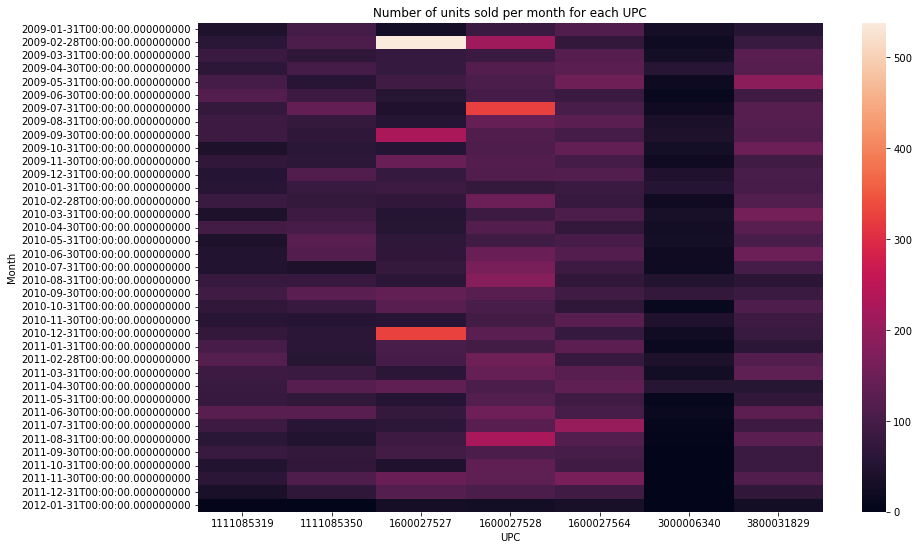

In [15]:
plt.figure(figsize=(14,9))
sns.heatmap(data=temp, annot=False)
plt.title('Number of units sold per month for each UPC')
plt.ylabel('Month')

Réorganisons maintenant les données pour obtenir la moyenne des ventes totales par mois (sur toutes les années) pour chaque UPC. Cela peut être fait en utilisant la méthode `apply()` de `pandas`. Je fais ensuite un `groupby()`.

In [16]:
temp = temp.reset_index()
temp['Month'] = temp.apply(lambda x: x.WEEK_END_DATE.month, axis='columns')
temp = temp.groupby('Month').mean()
temp.head()

UPC,1111085319,1111085350,1600027527,1600027528,1600027564,3000006340,3800031829
Month,,,,,,,
1,51.750000,60.250000,62.750000,69.750000,89.750000,24.500000,61.000000
2,87.000000,79.666667,235.000000,170.333333,76.666667,28.000000,104.333333
3,69.000000,79.000000,64.000000,104.333333,118.000000,30.000000,139.000000
4,80.333333,106.666667,88.666667,113.666667,111.333333,46.333333,101.000000
5,72.333333,83.333333,70.000000,104.000000,113.333333,18.333333,121.333333


Je peux maintenant dessiner la nouvelle carte thermique. J'ai maintenant mis `annot=True`. J'ai également défini `fmt='.1f'` afin d'afficher exactement une décimale pour les valeurs.

<AxesSubplot:title={'center':'Average number of units sold per month per UPC'}, xlabel='UPC', ylabel='Month'>

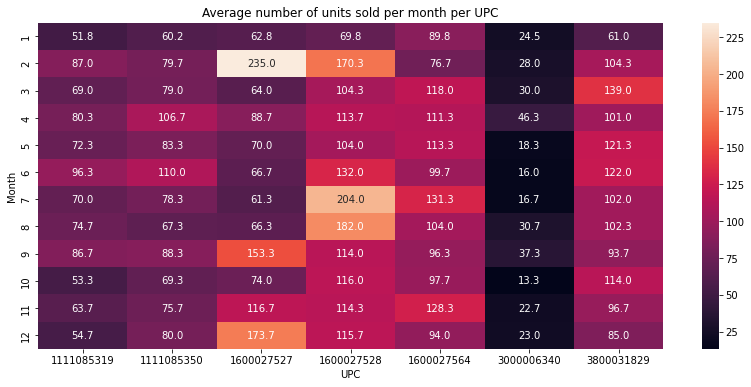

In [17]:
plt.figure(figsize=(14,6))
plt.title('Average number of units sold per month per UPC')
sns.heatmap(data=temp, annot=True, fmt='.1f')

La fonction `sns.heatmap()` peut également être utilisée pour vérifier la corrélation entre différentes variables d'un `DataFrame`; cela peut être nécessaire avant d'entraîner un modèle d'apprentissage automatique.

Nous utilisons ici une palette de couleurs divergentes car nous voulons que les valeurs supérieures à 0 soient de couleur différente des valeurs inférieures à 0.

<AxesSubplot:>

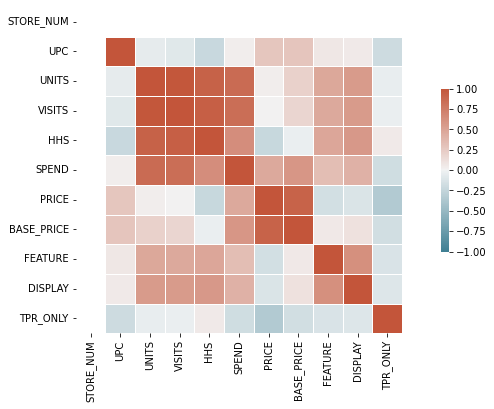

In [18]:
plt.figure(figsize=(14,6))

# Génère une palette de couleurs divergente personnalisée
# https://seaborn.pydata.org/tutorial/color_palettes.html#custom-diverging-palettes
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)

# Construit la figure
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(df.corr(), cmap=cmap, square=True,
            vmin=-1., vmax=1., center=0,  # fournit les valeurs min/max/centre pour les corrélations
            linewidths=.5, cbar_kws={"shrink": .5})  # fournit des paramètres à des fins esthétiques

# Nuage de points

D'autres graphiques populaires sont les nuages de points (c.-à-d., *scatterplots*). Plusieurs d'entre eux sont proposés dans `seaborn`.

Dans cette section, nous allons regarder l'association des rabais avec les ventes (en unités).

Pour ce faire, je calcule d'abord la réduction en pourcentage comme $ 100 \times \frac{BASE\_PRICE - PRICE}{BASE\_PRICE}$ et j'ajoute cette valeur comme la colonne MARKDOWN dans `df`.

In [19]:
df['MARKDOWN'] = (df['BASE_PRICE'] - df['PRICE']) / df['BASE_PRICE'] * 100
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,MARKDOWN
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,11.400651


Pour cette analyse, nous ne gardons que les observations où le MARKDOWN est strictement positif et mettons ces données dans `temp`.

In [20]:
temp = df.loc[df['MARKDOWN'] > 0, :]
temp.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,MARKDOWN
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,11.400651
5,2009-01-14,367,3000006340,19,17,17,38.76,2.04,2.74,0,0,1,QKER LIFE ORIGINAL,COLD CEREAL,ALL FAMILY CEREAL,25.547445
11,2009-01-21,367,1600027564,36,23,23,96.48,2.68,3.07,0,0,1,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,12.703583
30,2009-02-11,367,1600027527,243,187,179,403.38,1.66,3.19,1,1,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,47.962382
31,2009-02-11,367,1600027528,101,84,69,288.86,2.86,4.59,0,1,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,37.690632


Traçons maintenant ce nuage de points.

<AxesSubplot:title={'center':'Number of units sold and markdown in percentage'}, xlabel='MARKDOWN', ylabel='UNITS'>

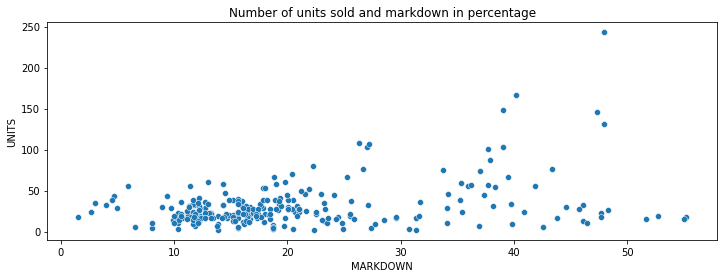

In [21]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage')
sns.scatterplot(data=temp, x='MARKDOWN', y='UNITS')

Ajoutons maintenant une ligne de régression aux observations de ce nuage de points. Pour ce faire, nous utilisons maintenant la fonction `sns.regplot()`.

<AxesSubplot:title={'center':'Number of units sold and markdown in percentage (with regression line)'}, xlabel='MARKDOWN', ylabel='UNITS'>

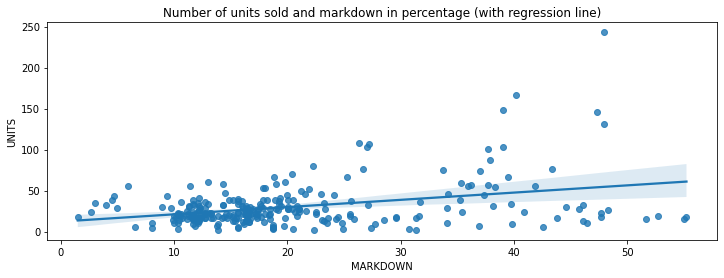

In [22]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage (with regression line)')
sns.regplot(data=temp, x='MARKDOWN', y='UNITS')

Identifions maintenant les réductions qui correspondent aux éléments de la circulaire et à d'autres types de réductions, et voyons si les associations entre MARKDOWN et UNITS sont différentes.

Nous pouvons le faire en définissant `hue='FEATURE'`. Rappelez-vous que FEATURE indique si l'élément est dans la circulaire ou non.

<AxesSubplot:title={'center':'Number of units sold and markdown in percentage\n (with indication of whether the item is featured in the circular)'}, xlabel='MARKDOWN', ylabel='UNITS'>

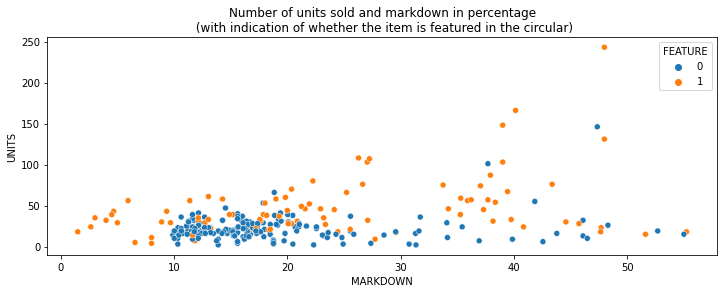

In [23]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage\n (with indication of whether'
         ' the item is featured in the circular)')
sns.scatterplot(data=temp, x='MARKDOWN', y='UNITS', hue='FEATURE')

Ajoutons à nouveau les lignes de régression au graphique précédent. Cela peut être fait avec la fonction `sns.lmplot()`. Notez que la définition de la taille de `lmplot` est différente des autres figures.

Notez également que j'ai désactivé la légende (`legend=False`) afin de la définir manuellement après. Je trouve cette nouvelle légende plus descriptive que celle ci-dessus.

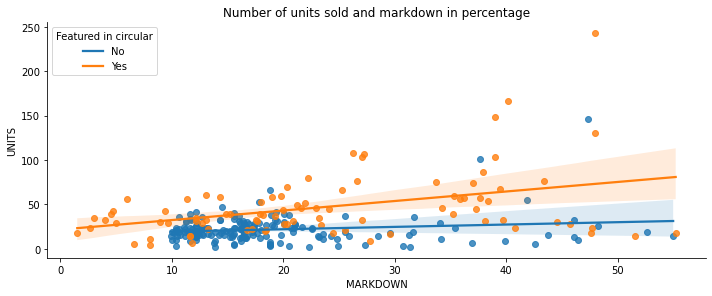

In [24]:
# La définition de la taille de lmplot est différente
# Regardez https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize/35949149
sns.lmplot(data=temp, x='MARKDOWN', y='UNITS', hue='FEATURE', legend=False, height=4, aspect=2.5)
plt.title('Number of units sold and markdown in percentage')

# Définit la légende
# Regardez https://stackoverflow.com/questions/45201514/edit-seaborn-legend
plt.legend(title='Featured in circular', loc='upper left', labels=['No', 'Yes'])

Il est également possible de supprimer la légende et de mettre les étiquettes à côté des lignes.

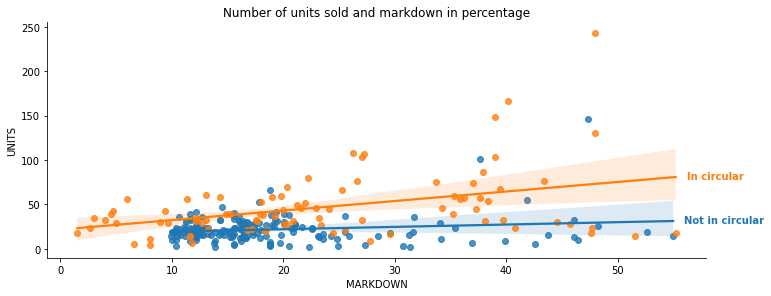

In [25]:
# La définition de la taille de lmplot est différente
# Regardez https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize/35949149
g = sns.lmplot(data=temp, x='MARKDOWN', y='UNITS', hue='FEATURE', legend=False, height=4, aspect=2.5)
plt.title('Number of units sold and markdown in percentage')

# Ajoute des étiquettes sous forme de texte dans la figure
# Regardez https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
# Regardez https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot
current_palette = sns.color_palette()  # obtient la palette de couleurs actuelle
axes = g.axes.flatten()
for i, txt in enumerate(['Not in circular', 'In circular']):  # pour les deux lignes
    x = axes[0].get_lines()[i].get_xdata()[-1]  # obtient la dernière position en x de la ligne
    y = axes[0].get_lines()[i].get_ydata()[-1]  # obtient la dernière position en y de la ligne
    axes[0].text(x+1, y-2, txt, color=current_palette[i],  # définit les étiquettes
                 horizontalalignment='left', size='medium', weight='semibold')

Nous voyons donc que ces ventes sont quelque peu différentes entre les articles des circulaires et les autres (même pour des réductions comparables). Jetons maintenant un œil à la répartition des ventes (en unités) pour les articles en circulaires et autres articles. Cela peut être fait avec `sns.swarmplot()` ainsi qu'avec d'autres fonctions dans la section suivante.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

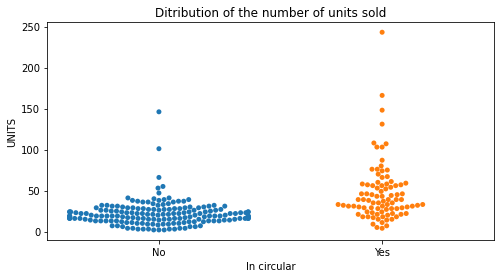

In [26]:
plt.figure(figsize=(8,4))
plt.title('Ditribution of the number of units sold')

g = sns.swarmplot(x=temp['FEATURE'], y=temp['UNITS'])

# Définit l'étiquette de l'axe des x et les étiquettes des marques
plt.xlabel('In circular')
g.set_xticklabels(['No', 'Yes'])

# Distributions
Nous terminons ce notebook avec différentes fonctions pour regarder les distributions.

Nous regardons à nouveau les rabais strictement positifs.

In [27]:
temp = df.loc[df['MARKDOWN'] > 0, :]

Une première option est d'utiliser `sns.distplot()`. Ici, j'utilise `kde=False`; l'utilisation de `kde=True` montre une distribution lissée au lieu de la distribution brute.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of markdowns'}, xlabel='MARKDOWN'>

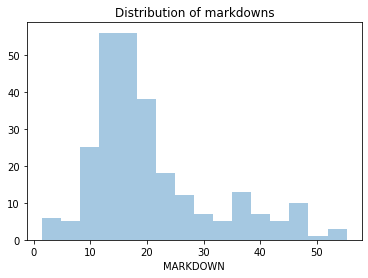

In [28]:
plt.title('Distribution of markdowns')
sns.distplot(a=temp['MARKDOWN'], kde=False)

Il est également possible de montrer plusieurs distributions sur la même figure. Cela peut être fait comme ci-dessous.

Notez que dans chaque appel à `sns.distplot()`, je mets le `label` pour la légende. Puis, sur la dernière ligne, je force la légende à apparaître.

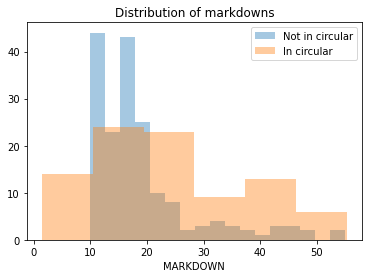

In [29]:
target = temp.loc[temp['FEATURE'] == 0, :]
sns.distplot(a=target['MARKDOWN'], label='Not in circular', kde=False)

target = temp.loc[temp['FEATURE'] == 1, :]
sns.distplot(a=target['MARKDOWN'], label='In circular', kde=False)

plt.title('Distribution of markdowns')

# Force la légende à apparaitre
plt.legend()

Enfin, il est possible de montrer la distribution jointe de deux variables avec `sns.jointplot()`.

Ici, la première distribution est pour MARKDOWN tandis que la deuxième distribution est pour BASE_PRICE.

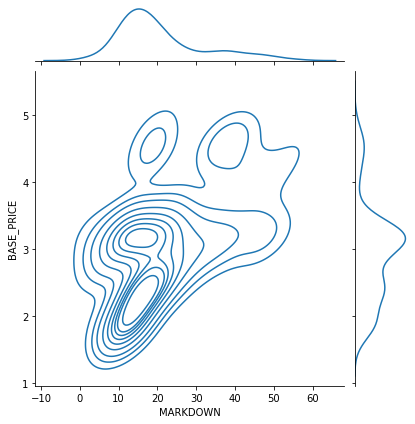

In [30]:
sns.jointplot(x=temp['MARKDOWN'], y=temp['BASE_PRICE'], kind='kde')

De nombreuses autres fonctions `seaborn` existent, veuillez vous référer à la [documentation](https://seaborn.pydata.org/) pour plus d'informations.

# Plusieurs figures
Dans certains cas, nous voulons afficher plusieurs figures. Ceci peut être fait en créant des *subplots* (en 1 ou 2 dimensions) et en assignant chaque figure à un de ces *subplots*.

Text(0.5, 1.0, 'UPC1600027527')

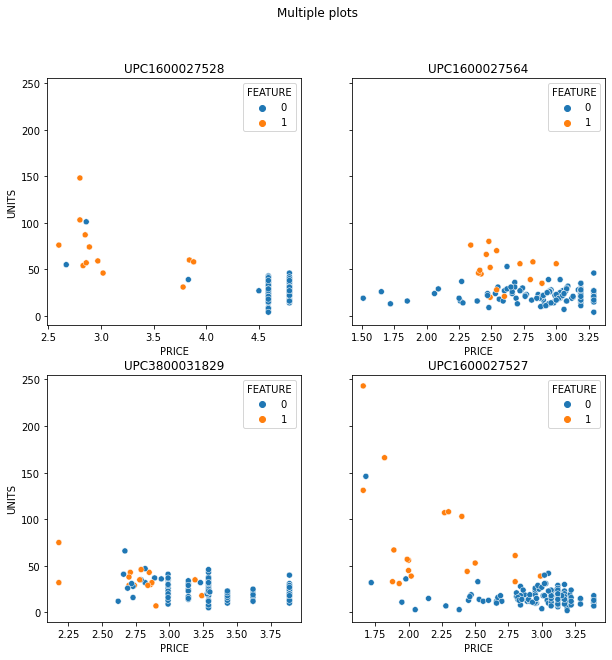

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharey=True)
fig.suptitle('Multiple plots')

# Figure en position [0,0]
df_one_UPC = df[df['UPC']==1600027528]
sns.scatterplot(ax=axes[0,0], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue=df_one_UPC['FEATURE'])
axes[0,0].set_title('UPC1600027528')

# Figure en position [0,1]
df_one_UPC = df[df['UPC']==1600027564]
sns.scatterplot(ax=axes[0,1], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue=df_one_UPC['FEATURE'])
axes[0,1].set_title('UPC1600027564')

# Figure en position [1,0]
df_one_UPC = df[df['UPC']==3800031829]
sns.scatterplot(ax=axes[1,0], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue=df_one_UPC['FEATURE'])
axes[1,0].set_title('UPC3800031829')

# Figure en position [1,1]
df_one_UPC = df[df['UPC']==1600027527]
sns.scatterplot(ax=axes[1,1], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue=df_one_UPC['FEATURE'])
axes[1,1].set_title('UPC1600027527')